___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Random Forest Project 

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Lending club had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016), so let's check out some of their data and keep the context in mind. This data is from before they even went public.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. You can download the data from [here](https://www.lendingclub.com/info/download-data.action) or just use the csv already provided. It's recommended you use the csv provided as it has been cleaned of NA values.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Import Libraries

**Import the usual libraries for pandas and plotting. You can import sklearn later on.**

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

** Use pandas to read loan_data.csv as a dataframe called loans.**

In [85]:
loans = pd.read_csv('loan_data.csv')

** Check out the info(), head(), and describe() methods on loans.**

In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [5]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [6]:
loans.groupby('not.fully.paid').size()

not.fully.paid
0    8045
1    1533
dtype: int64

In [7]:
loans.corr()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119
int.rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955
log.annual.inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666
days.with.cr.line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237
revol.bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699
revol.util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088
inq.last.6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452


In [8]:
loans.skew()

credit.policy        -1.539621
int.rate              0.164420
installment           0.912522
log.annual.inc        0.028668
dti                   0.023941
fico                  0.471260
days.with.cr.line     1.155748
revol.bal            11.161058
revol.util            0.059985
inq.last.6mths        3.584151
delinq.2yrs           6.061793
pub.rec               5.126434
not.fully.paid        1.854592
dtype: float64

# Exploratory Data Analysis

Let's do some data visualization! We'll use seaborn and pandas built-in plotting capabilities, but feel free to use whatever library you want. Don't worry about the colors matching, just worry about getting the main idea of the plot.

** Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**

*Note: This is pretty tricky, feel free to reference the solutions. You'll probably need one line of code for each histogram, I also recommend just using pandas built in .hist()*

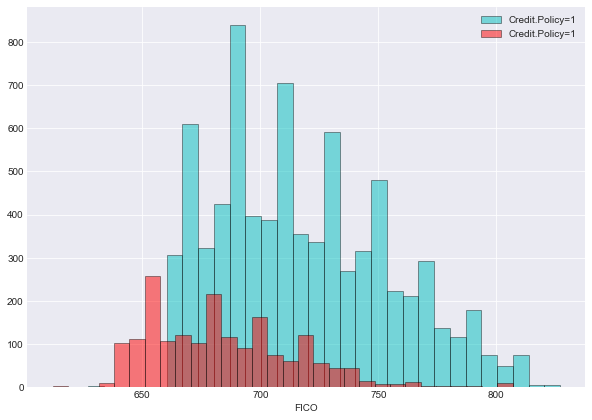

In [9]:
sns.set_style('darkgrid')
plt.figure(figsize = (10,7))
plt.hist(loans[loans['credit.policy']==1]['fico'],bins = 30,
         color = 'c',alpha=0.5,label='Credit.Policy=1',edgecolor='black', linewidth=0.8)
plt.hist(loans[loans['credit.policy']==0]['fico'],bins = 30,
         color = 'r',alpha=0.5,label='Credit.Policy=1',edgecolor='black', linewidth=0.8)
plt.legend()
plt.xlabel('FICO')
plt.show()

** Create a similar figure, except this time select by the not.fully.paid column.**

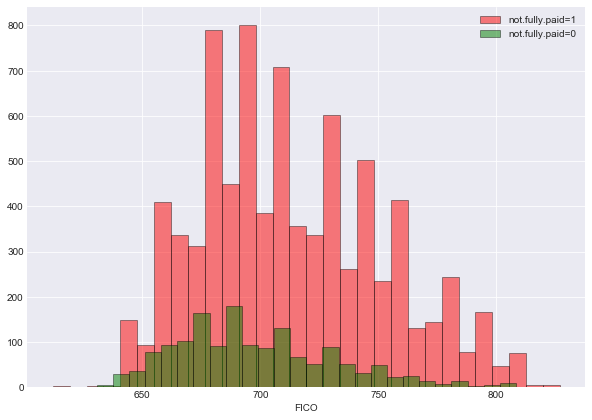

In [10]:
plt.figure(figsize = (10,7))
plt.hist(loans[loans['not.fully.paid']==0]['fico'],bins = 30,color = 'r',
         alpha=0.5,label='not.fully.paid=1',edgecolor='black', linewidth=0.8)
plt.hist(loans[loans['not.fully.paid']==1]['fico'],bins = 30,color = 'g',
         alpha=0.5,label='not.fully.paid=0',edgecolor='black', linewidth=0.8)
plt.legend()
plt.xlabel('FICO')
plt.show()

** Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid. **

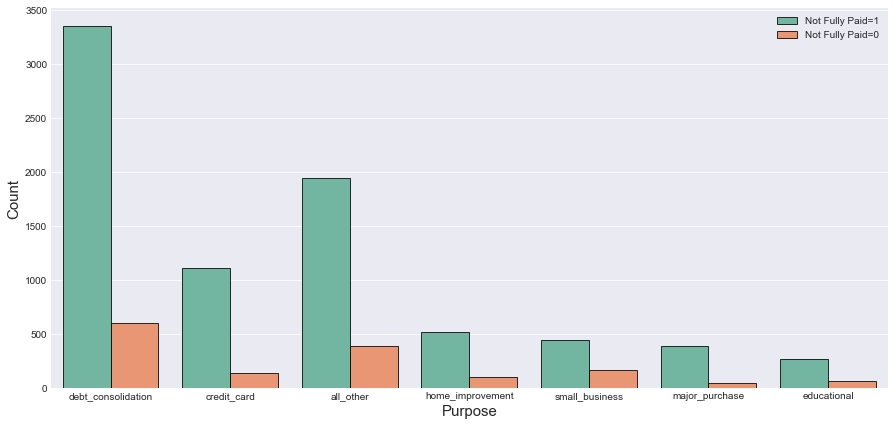

In [11]:
plt.figure(figsize=(15,7))
sns.countplot(x='purpose',data=loans,hue = 'not.fully.paid',palette = 'Set2',edgecolor='black', linewidth=0.8)
plt.legend(labels=['Not Fully Paid=1','Not Fully Paid=0'])
plt.xlabel('Purpose',size =15)
plt.ylabel('Count',size =15)
plt.show()

** Let's see the trend between FICO score and interest rate. Recreate the following jointplot.**

C:\Users\Ehtasham\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Ehtasham\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


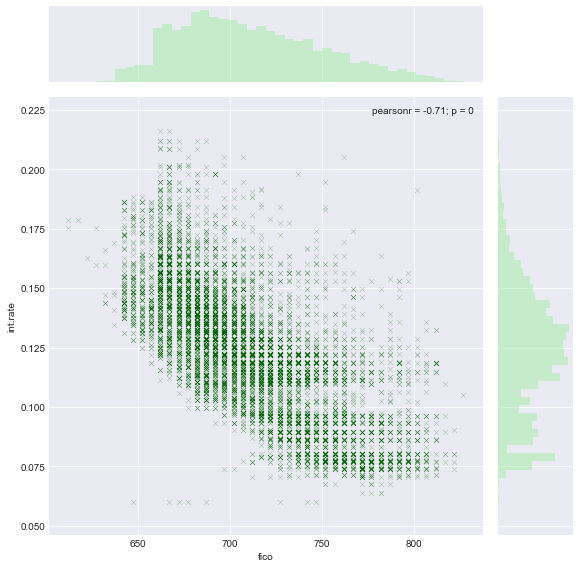

In [12]:
sns.jointplot(x='fico',y='int.rate',data=loans,
              size = 8,edgecolor='black', linewidth=0.5,color = 'lightgreen',
              joint_kws={'color':'darkgreen',"alpha":0.3,"s":25,'marker' :'x'})

** Create the following lmplots to see if the trend differed between not.fully.paid and credit.policy. Check the documentation for lmplot() if you can't figure out how to separate it into columns.**

<Figure size 720x576 with 0 Axes>

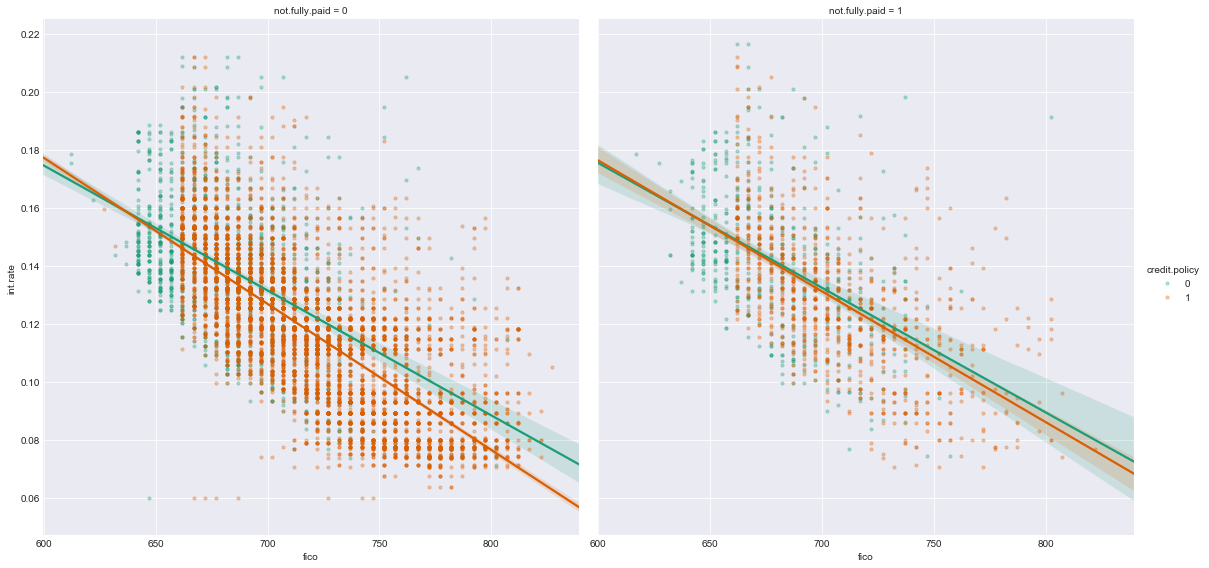

In [13]:
plt.figure(figsize=(10,8))
sns.lmplot(x='fico',y='int.rate',data = loans,
           hue = 'credit.policy',col='not.fully.paid',
           palette="Dark2",size = 8,
           scatter_kws={"alpha":0.3,"s":10})

# pairplot

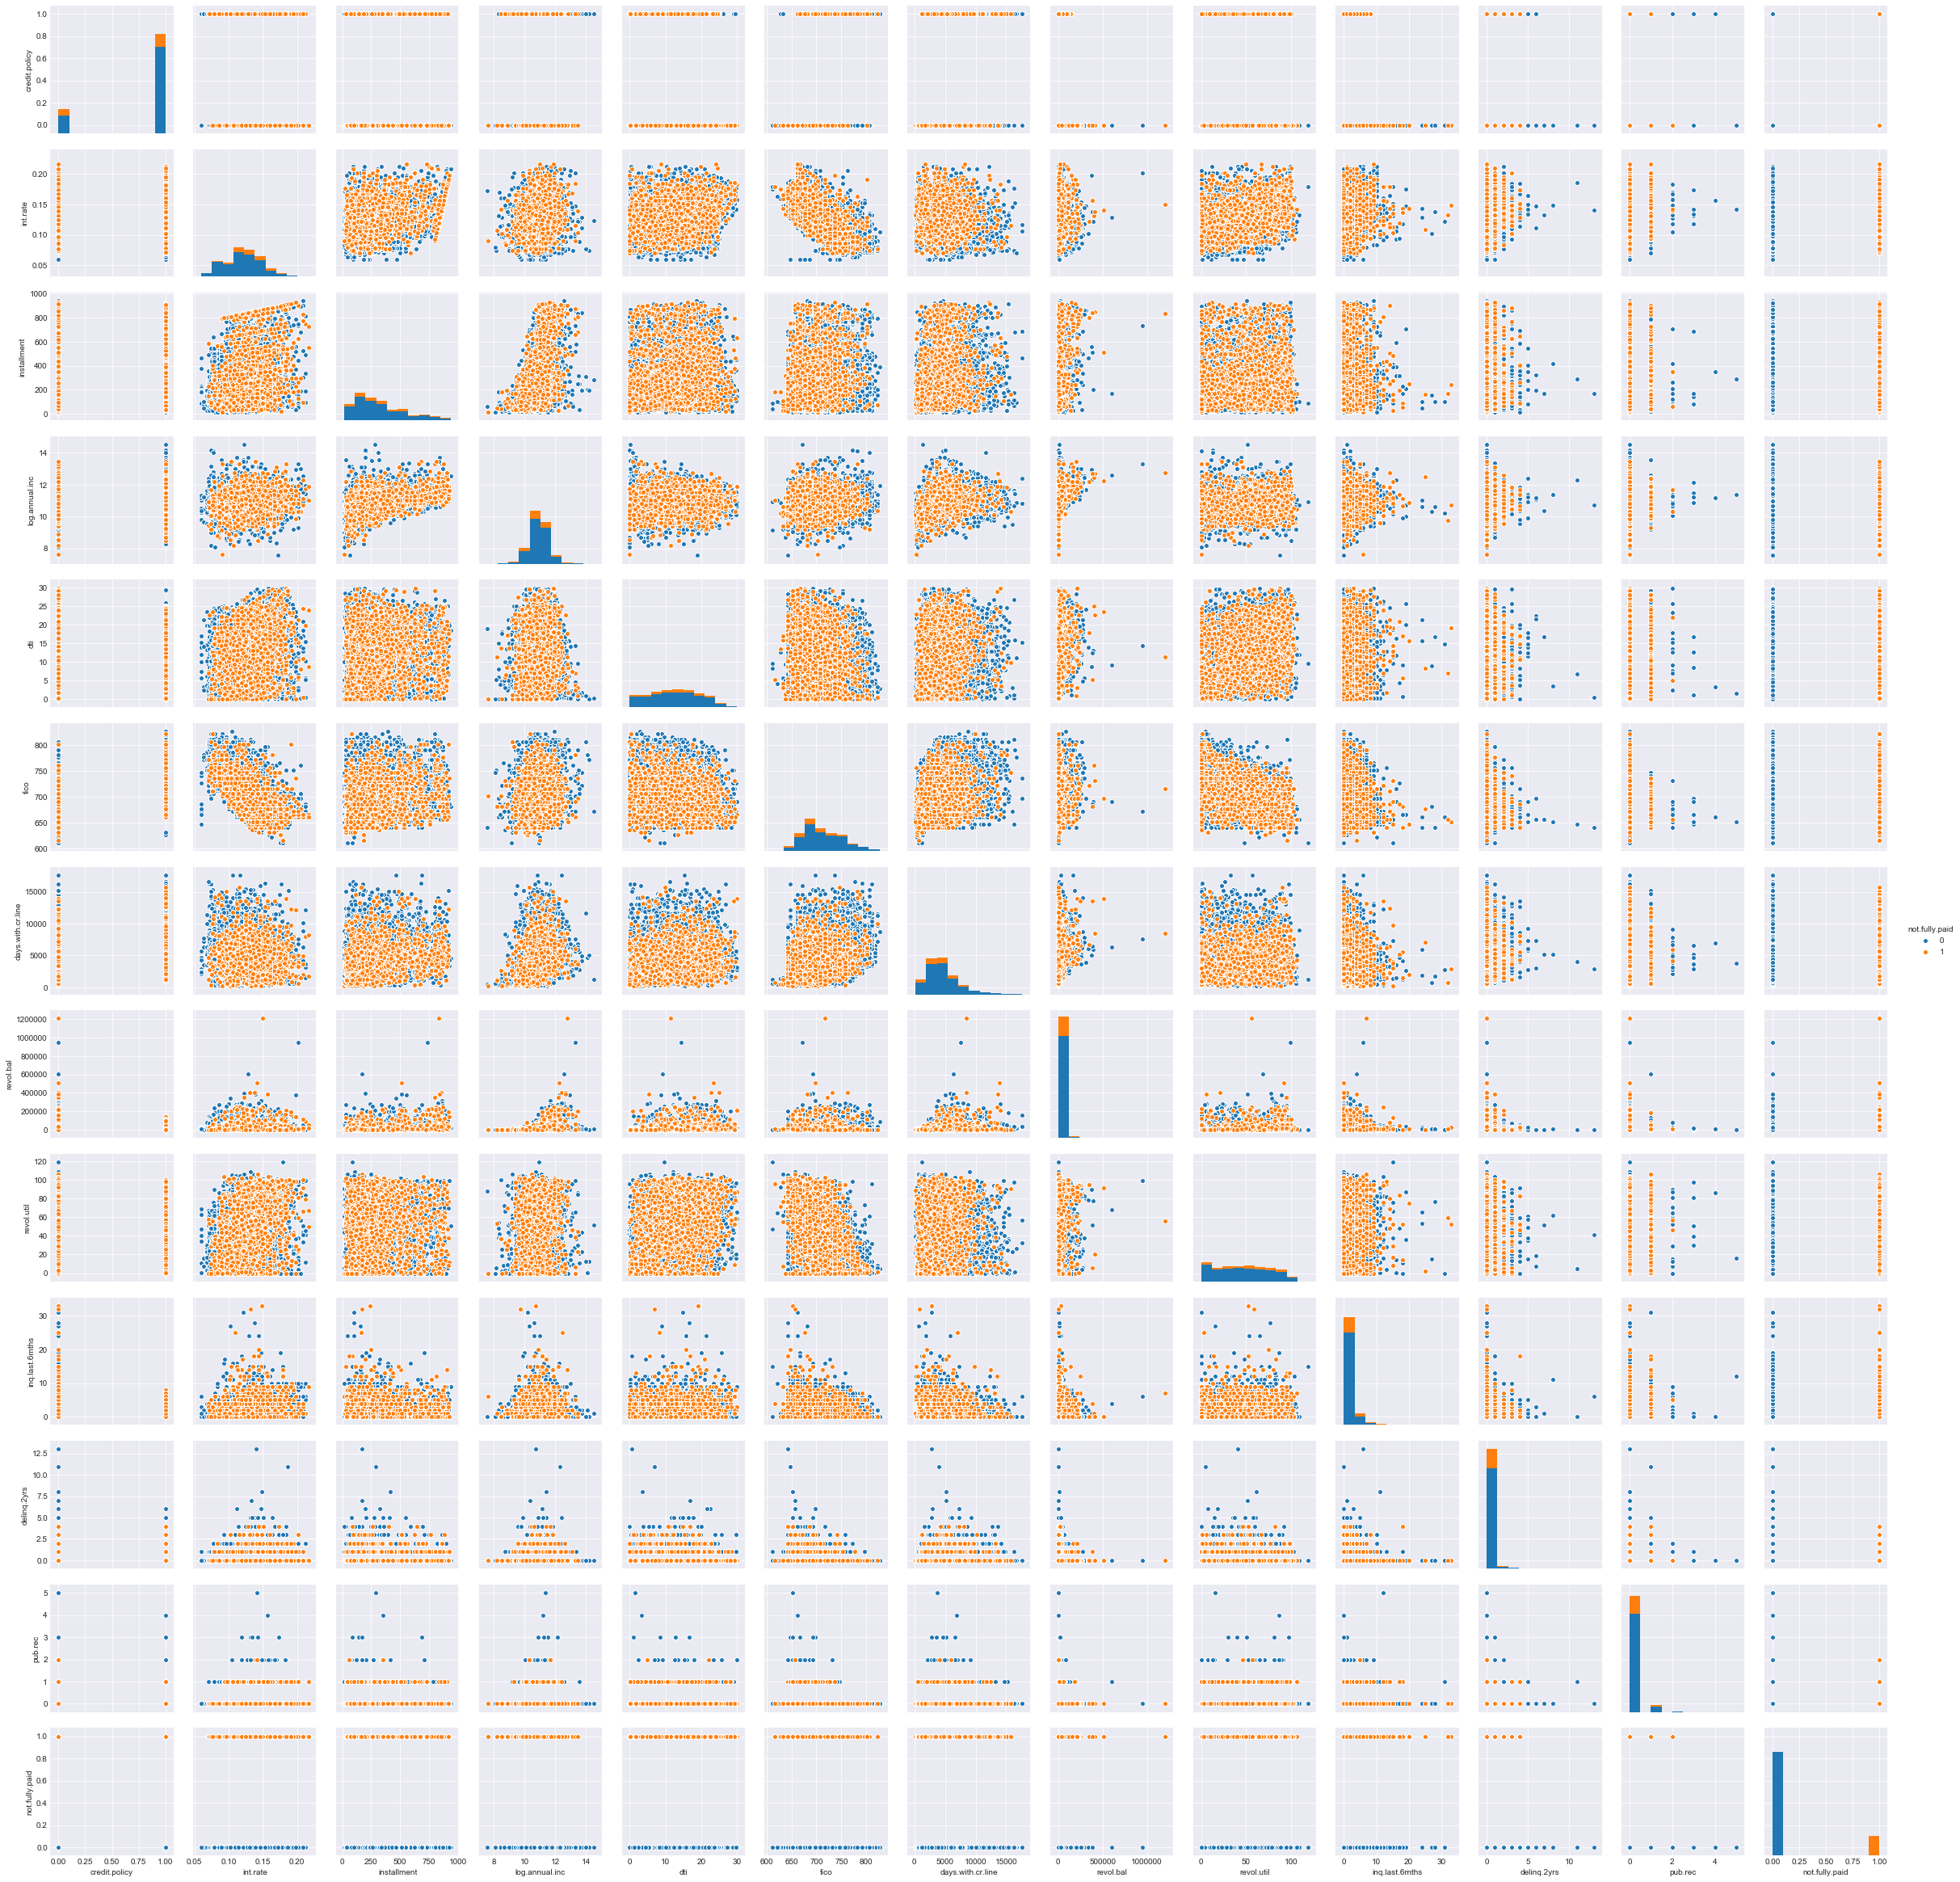

In [14]:
sns.pairplot(loans,hue='not.fully.paid')

# histogram

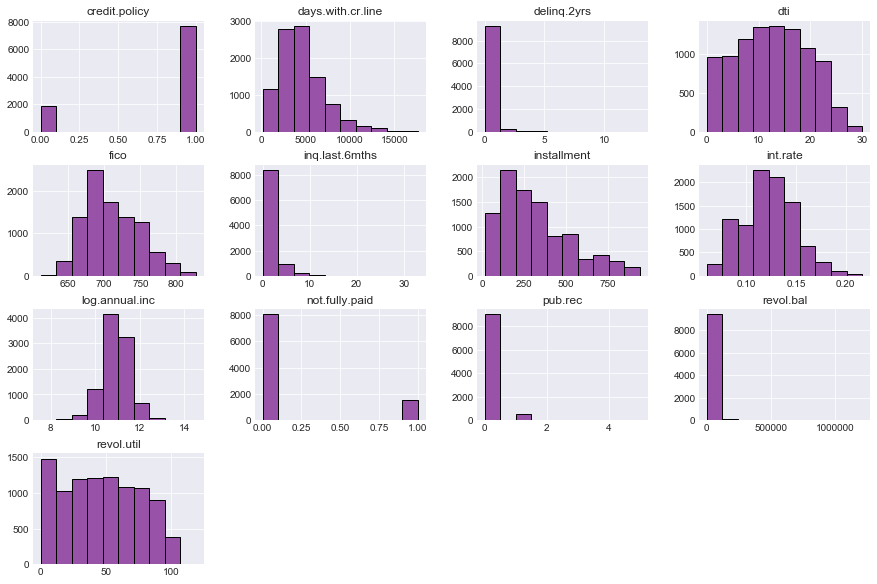

In [15]:
loans.hist(figsize=(15,10),edgecolor ='black',color ='#9852a8')
plt.show()

In [16]:
loans.skew()

credit.policy        -1.539621
int.rate              0.164420
installment           0.912522
log.annual.inc        0.028668
dti                   0.023941
fico                  0.471260
days.with.cr.line     1.155748
revol.bal            11.161058
revol.util            0.059985
inq.last.6mths        3.584151
delinq.2yrs           6.061793
pub.rec               5.126434
not.fully.paid        1.854592
dtype: float64

# Box plot

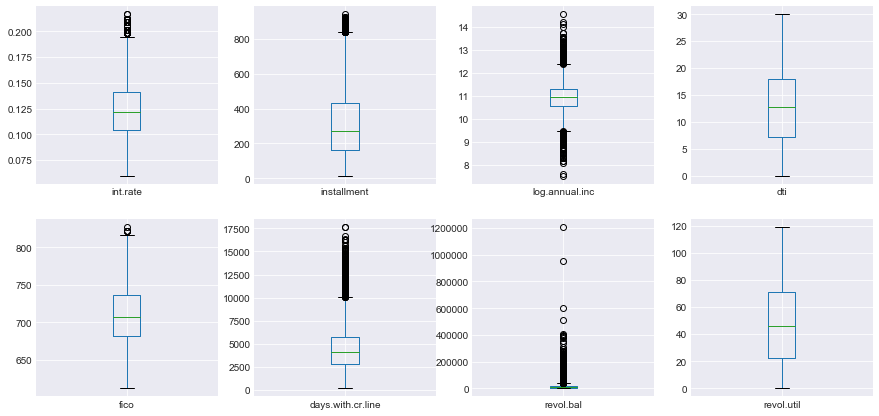

In [17]:
loans.drop(['credit.policy','inq.last.6mths','delinq.2yrs','pub.rec','not.fully.paid'],axis =1).plot(kind='box', figsize = (15,15),
                                                                                                     subplots=True, layout=(4,4))
                                                                                                     
plt.show()

# Correlation plot

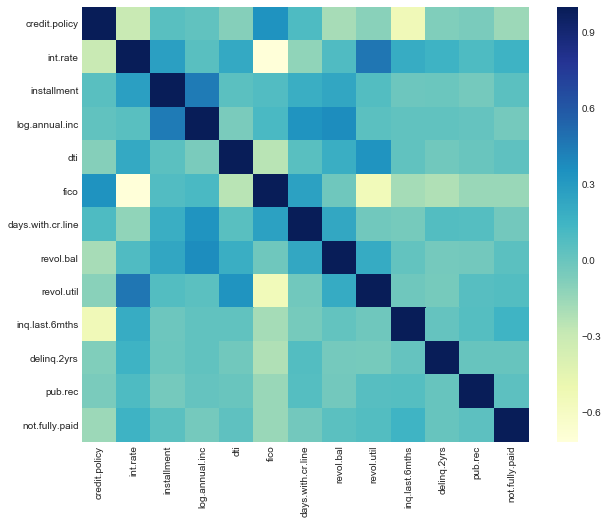

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(loans.corr(),cmap="YlGnBu")

# Setting up the Data

Let's get ready to set up our data for our Random Forest Classification Model!

**Check loans.info() again.**

In [19]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [20]:
loans.head()
#loans['purpose'].unique()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


## Categorical Features

Notice that the **purpose** column as categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.

Let's show you a way of dealing with these columns that can be expanded to multiple categorical features if necessary.

**Create a list of 1 element containing the string 'purpose'. Call this list cat_feats.**

In [21]:
cat_feats = ['purpose']

**Now use pd.get_dummies(loans,columns=cat_feats,drop_first=True) to create a fixed larger dataframe that has new feature columns with dummy variables. Set this dataframe as final_data.**

In [22]:
final_data = pd.get_dummies(loans,columns =cat_feats,drop_first=True)
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [23]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
credit.policy                 9578 non-null int64
int.rate                      9578 non-null float64
installment                   9578 non-null float64
log.annual.inc                9578 non-null float64
dti                           9578 non-null float64
fico                          9578 non-null int64
days.with.cr.line             9578 non-null float64
revol.bal                     9578 non-null int64
revol.util                    9578 non-null float64
inq.last.6mths                9578 non-null int64
delinq.2yrs                   9578 non-null int64
pub.rec                       9578 non-null int64
not.fully.paid                9578 non-null int64
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9578 non-null uint8
purpose_major_purchase        9

# Standardize the data

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler() # Centering and scaling happen independently on each feature

In [26]:
scaler.fit(final_data.drop('not.fully.paid',axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [27]:
scaled_featares = scaler.transform(final_data.drop('not.fully.paid',axis = 1))

In [28]:
scaled_df = pd.DataFrame(data = scaled_featares,columns = final_data.columns.drop('not.fully.paid'))

In [29]:
scaled_df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,0.492222,-0.139318,2.463099,0.680388,0.998505,0.688825,0.432230,0.353732,0.182704,-0.716989,-0.299730,-0.237003,-0.389558,1.191856,-0.192721,-0.265117,-0.218647,-0.262855
1,0.492222,-0.578868,-0.438854,0.244031,0.244540,-0.101303,-0.721230,0.495018,1.030602,-0.716989,-0.299730,-0.237003,2.567010,-0.839028,-0.192721,-0.265117,-0.218647,-0.262855
2,0.492222,0.486484,0.230708,-0.908659,-0.141885,-0.759742,0.059770,-0.397073,-0.730683,-0.262470,-0.299730,-0.237003,-0.389558,1.191856,-0.192721,-0.265117,-0.218647,-0.262855
3,0.492222,-0.813544,-0.757022,0.680388,-0.654697,0.030385,-0.745277,0.496321,0.909966,-0.262470,-0.299730,-0.237003,-0.389558,1.191856,-0.192721,-0.265117,-0.218647,-0.262855
4,0.492222,0.743509,-1.043992,0.597961,0.343326,-1.154806,-0.198161,-0.360663,-0.251586,-0.716989,1.531147,-0.237003,2.567010,-0.839028,-0.192721,-0.265117,-0.218647,-0.262855


## Train Test Split

Now its time to split our data into a training set and a testing set!

** Use sklearn to split your data into a training set and a testing set as we've done in the past.**

In [30]:
from sklearn.model_selection import train_test_split

In [71]:
x = final_data.drop('not.fully.paid',axis =1)
y = final_data['not.fully.paid']

#x = scaled_df
#y = final_data['not.fully.paid']

test_size = 0.30
seed = 101
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

## Training a Decision Tree Model

Let's start by training a single decision tree first!

** Import DecisionTreeClassifier**

In [32]:
from sklearn.tree import DecisionTreeClassifier

**Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

In [33]:
dtree = DecisionTreeClassifier()

# Import k-fold and cross_val_score and gridsearchCV from model_selection

In [34]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

** kfold cross validation without gridsearch**

In [35]:
kfold =KFold(n_splits=10,random_state=seed)
results_acc = cross_val_score(dtree,x_train,y_train,scoring ='accuracy',cv=kfold,n_jobs=-1)
results_roc = cross_val_score(dtree,x_train,y_train,scoring ='roc_auc',cv=kfold,n_jobs=-1)

In [36]:
print(' ACCURACY => Mean: {} & SD:{}'.format(results_acc.mean().round(3),results_acc.std().round(3)))
print('\n')
print(' AUC => Mean: {} & SD:{}'.format(results_roc.mean().round(3),results_roc.std().round(3)))

 ACCURACY => Mean: 0.729 & SD:0.013


 AUC => Mean: 0.53 & SD:0.023


** kfold cross validation with gridsearch**

In [37]:
max_features_grid = range(1,18)
param_grid = dict(max_features = max_features_grid)
grid = GridSearchCV(dtree,param_grid=param_grid,scoring ='roc_auc',n_jobs=3,cv=kfold,verbose=1)
grid_result = grid.fit(x_train,y_train)

Fitting 10 folds for each of 17 candidates, totalling 170 fits


[Parallel(n_jobs=3)]: Done 134 tasks      | elapsed:    5.9s
[Parallel(n_jobs=3)]: Done 170 out of 170 | elapsed:    7.4s finished


In [38]:
print(grid_result)
print('\n')
print('Best ROC Score: {}'.format(grid.best_score_))
print('\n')
print('Optimum Parameter: Maximum Features = {}'.format(grid.best_estimator_.max_features))
print('\n')
print('CV Results: {}'.format(grid.cv_results_))

GridSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=False),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=3,
       param_grid={'max_features': range(1, 18)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='roc_auc', verbose=1)


Best ROC Score: 0.5431162593002167


Optimum Parameter: Maximum Features = 10


CV Results: {'mean_fit_time': array([0.02261238, 0.02093689, 0.02812459, 0.03699238, 0.03772037,
       0.04027972, 0.04906347, 0.05552478, 0.06926532, 0.06414666,
       0.07123783, 0.07619352, 0.0803086 , 0.09245753, 0.09307714,
       0.10808251, 0.10908651

#### optimum paramater max_features = 9

In [39]:
dtree_opt = DecisionTreeClassifier(max_features=9)

In [40]:
dtree_opt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=9, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

## Predictions and Evaluation of Decision Tree
**Create predictions from the test set and create a classification report and a confusion matrix.**

In [41]:
y_hat_opt = dtree_opt.predict(x_test)

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

In [43]:
print(classification_report(y_test,y_hat_opt))

             precision    recall  f1-score   support

          0       0.86      0.84      0.85      2422
          1       0.22      0.24      0.23       452

avg / total       0.75      0.74      0.75      2874



In [44]:
print(confusion_matrix(y_test,y_hat_opt))

[[2029  393]
 [ 344  108]]


## Training the Random Forest model

Now its time to train our model!

**Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.**

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
rf = RandomForestClassifier()

** cross validation without gridsearch**

In [74]:
kfold = KFold(n_splits=10,random_state=seed)
results_acc = cross_val_score(rf,x_train,y_train,scoring='accuracy',cv=kfold,n_jobs=3,verbose=1)
results_roc = cross_val_score(rf,x_train,y_train,scoring='roc_auc',cv=kfold,n_jobs=3,verbose=1)

[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:   11.3s finished
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    4.1s finished


In [75]:
print(' ACCURACY => Mean: {} & SD:{}'.format(results_acc.mean().round(3),results_acc.std().round(3)))
print('\n')
print(' AUC => Mean: {} & SD:{}'.format(results_roc.mean().round(3),results_roc.std().round(3)))

 ACCURACY => Mean: 0.825 & SD:0.01


 AUC => Mean: 0.625 & SD:0.025


** cross validation without gridsearch**

In [76]:
estimators_grid = range(100,1000,50)
param_grid = dict(n_estimators= estimators_grid)
grid = GridSearchCV(rf,param_grid=param_grid,scoring ='accuracy',n_jobs=-1,cv=kfold,verbose=1)
grid_result = grid.fit(x_train,y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   55.0s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 11.3min finished


In [77]:
print(grid_result)
print('\n')
print('Best accuracy Score: {}'.format(grid.best_score_))
print('\n')
print('Optimum Parameter: n_estimators = {}'.format(grid.best_estimator_.n_estimators))
print('\n')
print('CV Results: {}'.format(grid.cv_results_))

GridSearchCV(cv=KFold(n_splits=10, random_state=101, shuffle=False),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': range(100, 1000, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)


Best accuracy Score: 0.836217183770883


Optimum Parameter: n_estimators = 550


CV Results: {'mean_fit_time': array([ 2.53526616,  3.92751889,  4.26505716,  5.60435026,  6.78282561,
        7.87295454,  9.81925678, 11.30163879, 13.82858818, 14.01994

** Optimum parameter n_estimators = 550 **

In [78]:
rf_opt = RandomForestClassifier(n_estimators = 550)
rf_opt.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=550, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.

** Predict the class of not.fully.paid for the X_test data.**

In [79]:
y_hat = rf_opt.predict(x_test)

**Now create a classification report from the results. Do you get anything strange or some sort of warning?**

In [81]:
from sklearn.metrics import classification_report,confusion_matrix

In [82]:
print(classification_report(y_test,y_hat))

             precision    recall  f1-score   support

          0       0.85      1.00      0.92      2431
          1       0.78      0.03      0.06       443

avg / total       0.84      0.85      0.79      2874



**Show the Confusion Matrix for the predictions.**

In [83]:
print(confusion_matrix(y_test,y_hat))

[[2427    4]
 [ 429   14]]
